<a href="https://colab.research.google.com/github/vgorbikov/infotransfer_labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание


Для соответствующих законов распределения рассчитать дивергенцию Кульбака-Лейблера $D_{f_X||g_Y}$ (в непрерывном и дискретном случае).


Проверить справедливость тождества:
$$
D_{f_X||g_Y} = H(X,Y) - H(X)
$$
и неравенства (следствие теоремы Крафта-Макмиллана):
$$
D_{f_X||g_Y} \ge 0
$$
где $D_{f_X||g_Y} = 0$ только в случае $f_X = g_Y$

и свойства несимметричности:
$$
D_{f_X||g_Y} \ne D_{g_Y||f_X}
$$

Расчет дивергенции Кульбака-Лейблера для дискретной случайной величины сравнить с встроенной функцией scipy.special.rel_entr.

## Вариант 8

**Логистическое распределение** c параметрами $\mu = 2$ и $s = 1$ и\
**распределение Лапласа** с параметрами $\alpha = 1$ и $\beta = 2$ в промежутке $[−10; 10]$.

**Гипергеометрические распределения** с
параметрами $M = 40$, $n = 7$, $N = 12$ и \
$M = 40$, $n = 15$, $N = 20$ соответственно при $k = \overline{0,20}$

## Теория



В общем случае, если
$\mu$ — любая мера на $X$, для которой существуют абсолютно непрерывные относительно $\mu$ функции $p = \frac{dP}{d\mu}$ и $q = \frac{dQ}{d\mu}$, тогда расхождение Кульбака — Лейблера распределения $Q$ относительно $P$ определяется как
$$
D_{KL}(P||Q) = \int_X p \log{\frac{p}{q}} d\mu
$$

Основание логарифма в этой формуле существенной роли не играет. Его выбор позволяет зафиксировать конкретный вид функционала из семейства эквивалентных функционалов и равносилен выбору единицы измерения расхождения Кульбака — Лейблера (подобно ситуации с вычислением энтропии), поэтому возможно применение логарифма с любым основанием, большим единицы.



## Решение

In [7]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

In [114]:
# Получим точки исследуемого отрезка для непрерывных распределений
xs = np.arange(-10, 10, 0.01)
# И для дискретных
xs_int = np.arange(0, 20)

# Получим точки Y кривой плотности распределения для непрерывных распределений
ys_alog = sp.stats.logistic(2,1).pdf(xs)
ys_alap = sp.stats.laplace(1, 2).pdf(xs)

# И для дискретного случая
ys_h1 = sp.stats.hypergeom(40, 7, 12).pmf(xs_int)
ys_h2 = sp.stats.hypergeom(40, 15, 20).pmf(xs_int)

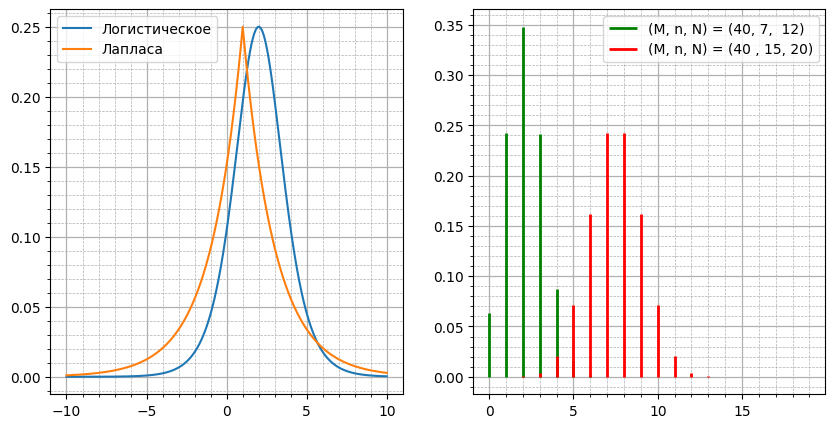

In [133]:
# Построим функции распределения на исследуемом отрезке
fig, ax = plt.subplots(1, 2, figsize=(10,5))


ax[0].plot(xs, ys_alog, label='Логистическое')
ax[0].plot(xs, ys_alap, label='Лапласа')

ax[1].vlines(xs_int, 0, ys_h1, lw=2, label='(M, n, N) = (40, 7,  12)', color='green')
ax[1].vlines(xs_int, 0, ys_h2, lw=2, label='(M, n, N) = (40 , 15, 20)', color='red')

ax[0].legend()
ax[0].minorticks_on()
ax[0].grid(visible=True, which='major', linewidth=0.9)
ax[0].grid(visible=True, which='minor', linestyle='--', linewidth=0.5)

ax[1].legend()
ax[1].minorticks_on()
ax[1].grid(visible=True, which='major', linewidth=0.9)
ax[1].grid(visible=True, which='minor', linestyle='--', linewidth=0.5)

In [71]:
def ftw(a: list, b: list):
  if len(a) != len(b):
    raise ValueError
  answ = []
  for i in range(len(a)):
    answ.append(a[i]*np.log(a[i]/b[i]))

  return np.array(answ)



In [72]:
my_bins = ftw(ys_alog, ys_alap)
sp_bins = sp.special.rel_entr(ys_alog, ys_alap)

print(sum(my_bins*0.01))
print(sum(sp_bins*0.01))

0.20046894069956853
0.20046894069956853
